# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

# Setting up directories

In [3]:
cwd = os.getcwd()
cwd

'C:\\Users\\INNODVOH\\OneDrive - Durr Group\\Desktop\\Practice\\PGP_Glass_Hackerearth'

In [4]:
# Reading Train and Test Data
train_data = pd.read_csv(cwd+'/dataset/train.csv')
# Reading Train and Test Data
test_data = pd.read_csv(cwd+'/dataset/test.csv')

In [5]:
train_data.head()

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket


In [6]:
train_data.shape

(8227, 2)

# Exploring Target Distribution

In [7]:
train_data['label'].value_counts(normalize = True)

Cricket      0.189133
Wrestling    0.178802
Tennis       0.175641
Badminton    0.169442
Soccer       0.144403
Swimming     0.072323
Karate       0.070256
Name: label, dtype: float64

# Reading Images from Train Data 

In [8]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img('dataset/train/'+train_data['image_ID'][i],target_size=(100,100,1), grayscale=True) # Removed Target Size
    img = image.img_to_array(img)
    #img = numpy.asarray()
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|                                                                                         | 0/8227 [00:00<?, ?it/s]C:\Users\INNODVOH\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████████████████████████████████████████████████████████████████████████| 8227/8227 [02:05<00:00, 65.75it/s]


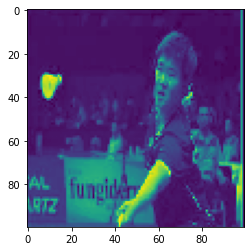

In [9]:
plt.imshow(train_image[1])

In [10]:
img.shape

(100, 100, 1)

In [11]:
X.shape

(8227, 100, 100, 1)

# Label and OHE Target Variable

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train_data['label'])

In [13]:
y = to_categorical(y)

In [14]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
X_train.shape,y_train.shape

((6581, 100, 100, 1), (6581, 7))

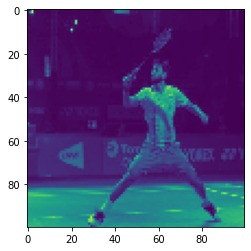

In [17]:
plt.imshow(train_image[0])

# Designing Convolutional Neural Net

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
206/206 [==============================] - 147s 711ms/step - loss: 2.2798 - accuracy: 0.2453 - val_loss: 1.5815 - val_accuracy: 0.4028
Epoch 2/10
206/206 [==============================] - 147s 711ms/step - loss: 1.3686 - accuracy: 0.5042 - val_loss: 1.2778 - val_accuracy: 0.5589
Epoch 3/10
206/206 [==============================] - 147s 716ms/step - loss: 0.8324 - accuracy: 0.7338 - val_loss: 1.1134 - val_accuracy: 0.6318
Epoch 4/10
206/206 [==============================] - 150s 729ms/step - loss: 0.4364 - accuracy: 0.8612 - val_loss: 1.1705 - val_accuracy: 0.6695
Epoch 5/10
206/206 [==============================] - 156s 759ms/step - loss: 0.2560 - accuracy: 0.9233 - val_loss: 1.3249 - val_accuracy: 0.6871
Epoch 6/10
206/206 [==============================] - 144s 697ms/step - loss: 0.1684 - accuracy: 0.9508 - val_loss: 1.4752 - val_accuracy: 0.6841
Epoch 7/10
206/206 [==============================] - 144s 698ms/step - loss: 0.1348 - accuracy: 0.9561 - val_loss: 1.5122 -

# Loading Test Data

In [23]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img('dataset/test/'+test_data['image_ID'][i], target_size=(100,100,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|█████████████████████████████████████████████████████████████████████████████| 2056/2056 [00:13<00:00, 151.77it/s]


# Generating Predictions

In [24]:
# making predictions
prediction = model.predict_classes(test)

In [25]:
le.inverse_transform(prediction)

array(['Soccer', 'Soccer', 'Cricket', ..., 'Wrestling', 'Karate',
       'Cricket'], dtype=object)

In [27]:
answer = le.inverse_transform(prediction)

In [30]:
answer[0:5]

array(['Soccer', 'Soccer', 'Cricket', 'Wrestling', 'Badminton'],
      dtype=object)

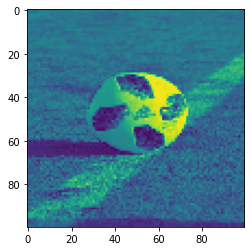

In [28]:
plt.imshow(test_image[0])

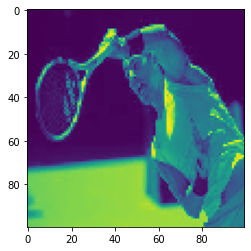

In [33]:
plt.imshow(test_image[4])

# Submitting Predictions

In [34]:
sample_sub = pd.read_csv(cwd+'/dataset/sample_submission.csv')

In [35]:
sub_data = test_data.copy()

In [36]:
sub_data['label'] = answer

In [37]:
sub_data.to_csv("Covo_Net_100.csv",index = False)

# Naive Solution-  Brute Force - All Cricket

In [38]:
sample_sub = pd.read_csv(cwd+'/dataset/sample_submission.csv')

In [39]:
sample_sub.head()

,image_ID,label
0,0e62f4d8f2.jpg,Badminton
1,cfd2c28c74.jpg,Cricket
2,e06a27208d.jpg,Tennis
3,44771fadd2.jpg,Badminton
4,da4d3e218c.jpg,Swimming


In [40]:
sub_data = test_data.copy()

In [41]:
sub_data.head()

,image_ID
0,f5e13966e7.jpg
1,6674191b4e.jpg
2,91b5f8b7a9.jpg
3,393119b6d6.jpg
4,1ce5f81578.jpg


In [42]:
sub_data['label'] = 'Cricket'

In [43]:
sub_data.to_csv("Baseline.csv",index = False)